# 2022.01.07 EXPLORATION_US 프로젝트 


# 프로젝트를 시작하면서 

오늘은 2번째 EXP! Scikit-Learn을 이용하여 Dataset을 가져와 머신러닝 모델을 만들고, 
가져온 데이터 셋을 학습, 예측하고 성능을 시험해 보았다. 오늘 배운 내용을 토대로, 
3가지 데이터셋을 가져와 직접 모델을 만들어 데이터를 학습,예측하고 성능을 시험해보자! 

# 🤔 Dataset을 가져오기 전에.. 

데이터를 가져오기 전에 
1. 데이터셋을 가져오는 목적은?
2. 가져올 데이터 셋의 정보를 확인
3. 가져온 데이터셋이 어떤 학습에 적합하고, 어떤 머신러닝 모델을 사용할까?

를 시작하기 전에 먼저 고려해 봐야 한다. 


----

# 📝 모듈불러오기

* Dataset을 불러오기 위해선 먼저, 필요한 모듈을 불러와야 한다. 
 1. import를 이용해 데이터 확인에 필요한 모듈, 
 2. 데이터셋과, 
 3. 데이터를 학습과 test용으로 나누기 위한 모듈, 
 4. 학습기 모델을 만들 모듈
 5. 학습과 예측 후 성능을 판단할 모듈도 불러와준다. 


In [2]:
# 필요한 모듈 불러오기 
import numpy as np
import pandas as pd #데이터셋 확인용
import matplotlib.pyplot as plt # 데이터셋 확인
#3가지 데이터셋
from sklearn.datasets import load_digits # 손글씨 데이터셋
from sklearn.datasets import load_wine # 와인 데이터셋 
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋  
#데이터셋 다루기용 모듈
from sklearn.model_selection import train_test_split #데이터 나누기용 
from sklearn.metrics import classification_report # 모델 성능 판단용 
from sklearn.metrics import confusion_matrix # 오차행렬 가져오기 
from sklearn.metrics import accuracy_score # 모델 test 정확도 
# 5가지 모델 
from sklearn.tree import DecisionTreeClassifier # Decision Tree 가져오기 
from sklearn.ensemble import RandomForestClassifier # Random Forest 가져오기
from sklearn import svm # 선형 분류 알고리즘 가져오기 
from sklearn.linear_model import SGDClassifier # SGD 모듈 가져오기
from sklearn.linear_model import LogisticRegression # LogisticRegression 가져오기 


----

### 프로젝트를 진행하기 전에, 5가지 모델에 대해서 간단하게 정리

#### 1. DecisionTree
   * 데이터를 분석하여 데이터 사이에 존재하는 패턴을 예측가능한 규칙들의 조합으로 나타내는데, 그 모양이 나무와 같다하여 의사결정 나무라 함.  
   * 규칙을 나무구조로 도표화하여 분류하고 예측을 수행하는 분석방법 
   * 분류,예측할 때 스무고개와 같기 때문에, 이유를 설명하기 쉬움. 
   * 결정 경계가 데이터 축에 수직이여서 특정 데이터에만 잘 작동할 수 있단 문제가 있다.  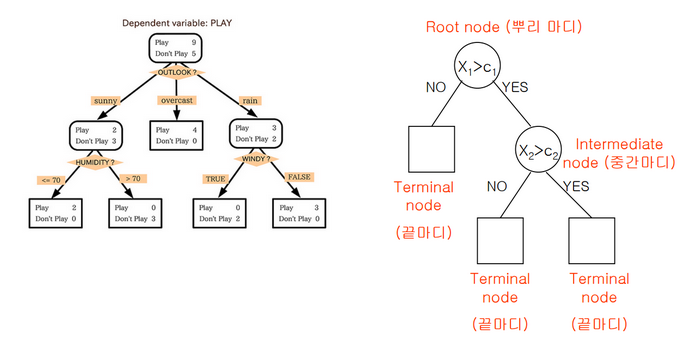


#### 2.RandomForest
   * 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법. 
   * 데이터의 특징차원에서 일부만 선택하여 서용
   * 독립 변수 차원을 랜덤하게 감소시킨 후 독립변수를 선택
   * 각 독립 변수의 중요도를 계산할 수 있다. ..? 
   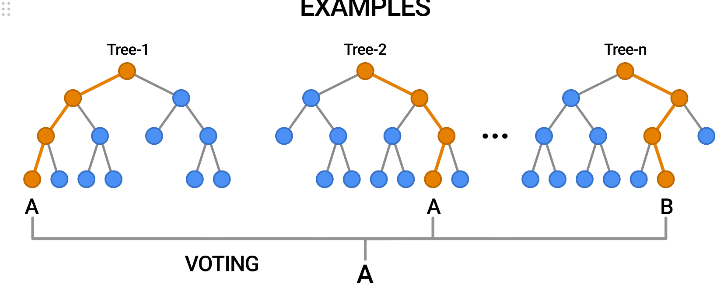

#### 3.svm (서포트 벡터 머신) 
   * 두 카테고리중 어느 하나에 속한 데이터의 집합이 주어졌을 때, 새로운 데이터가 어느 카테고리에 속할 지 판단하는 모델을 만듬. 
   * 결정 경계를 정의하는것이 서포트 벡터이기 때문에, 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 많은 데이터 포인트들을 무시할 수 있어 빠르다.
   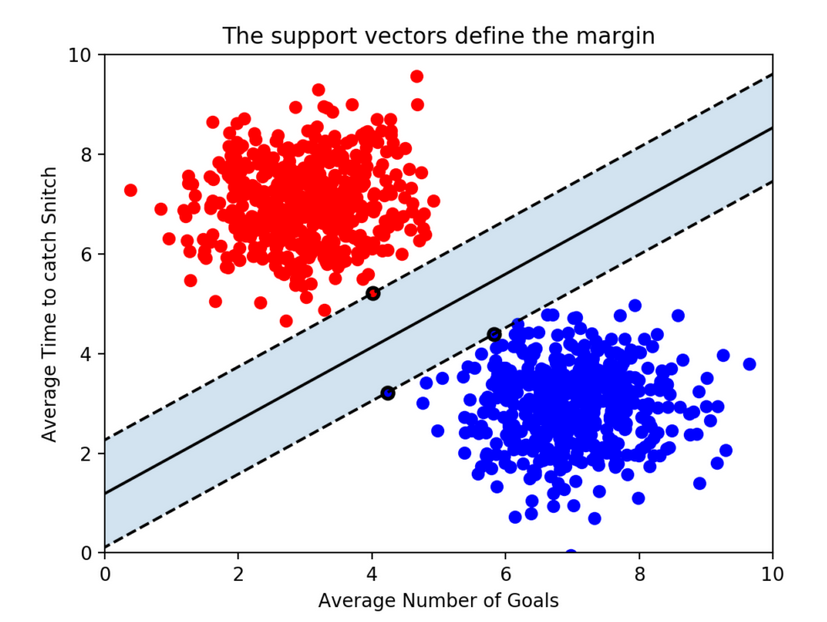

#### 4.SGDClassifier (확률적 경사 하강법)
   * 회귀, classification 
   * 전체 데이터중 랜덤하게 선택된 단 하나의 데이터를 이용해 학습시키는 방법 
   * 랜덤하게 추출한 일부 데이터들에게 가중치를 조절 => 최적 해의 정확도는 낮음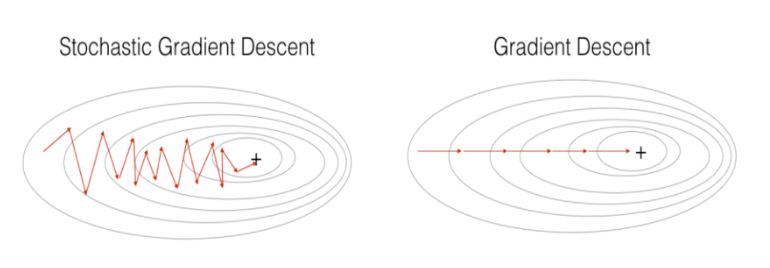 


#### 5.LogisticRegression
   * 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측, 그 확률에 따라 가능성이 더 높은 범주에 속하는 쪽으로 분류해 주는 알고리즘. 
   * 데이터가 특정 범주에 속할 확률을 예측하기 위해 데이터를 0~1 사이의 값으로 변환하는 과정을 거침  
   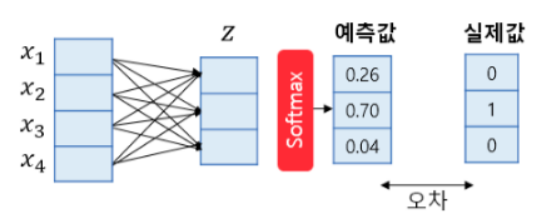

----

# 1. 손글씨를 분류 해보자!

처음에 다뤄볼 데이터 셋은 손글씨 데이터이다.  
DESCR 로 확인 해 볼 수도 있지만, 그래도 데이터를 다루기 전에 한번은 읽어와도 좋을것 같다! => 
[손글씨 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

## 1-1. Dataset 확인하기
* 가져온 데이터셋을 가져와 어떤 데이터가 들어있는지 확인 해보자! 
* 데이터를 지정하고, 잘 됬는지도 확인 해보자. 

In [3]:
# 가져온 데이터셋 확인 - 어떤 변수와 메서드를 가지고 있나? 
hand = load_digits()
print(dir(hand))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [4]:
# 손글씨 데이터의 정보를 확인 해 보자
print(hand.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

1. 손글씨 데이터셋은 총 8x8 픽셀로 이루어진 1797개의 손글씨 데이터, 각 데이터는 64개의 특성을 가졌으며, label은 0~9까지 10개로 구성되어있다.
2. 손글씨 데이터셋은 안에 정답이 존재하고, 그림을 분류 해야하는 것이기 때문에, **지도학습**이며 **분류문제** 라 할 수 있겠다. 적합한 모델은 다양한 모델로 학습 시켜 보면서 알아보도록 하자! 


In [5]:
# data : 데이터의 크기, 모델이 학습 해야 할 데이터 
# feature_names : 각 feature에 대한 설명 = 열 제목  
# target : label 데이터  = 정답지 
# target_names : 클래스의 원래 이름  

hand_data = hand.data # 문제지 데이터
hand_label = hand.target # 정답지 데이터 
hand_lbname = hand.target_names # 정답지 데이터 클래스의 원래 이름 

In [6]:
#손글씨 데이터의 형태를 확인. 
print(hand_data.shape) 
#클래스 이름도 확인 해 보자
hand_lbname

(1797, 64)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# 손글씨 데이터에 대한 data 
df = pd.DataFrame(hand_data, columns=hand.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## 1-2. Data 나누기 - 모델 학습(train), test 용 
* scikit-learn의 train_test_split 을 활용하여 Data를 나눠보자. 
* X 변수는 모델이 풀어야 할 문제지 , y 변수는 정답지 로 표현하였습니다.
* 학습용 : test용 = 8 : 2 비율로 나눴습니다. 
* 손글씨 데이터에 대한 문제,정답지 이므로 변수 옆에 숫자를 기입했습니다. 
     * **1 = 손글씨**, 2 = 와인, 3 = 유방암 


In [8]:
#데이터 나누기 
X1_train, X1_test, y1_train, y1_test = train_test_split(hand_data, hand_label, test_size=0.2, random_state=35)

In [9]:
print('손글씨 학습용 문제지 데이터 : ', X1_train.shape)
print('손글씨 학습용 정답지 데이터 : ', y1_train.shape)
print('손글씨 test용 문제지 데이터 : ', X1_test.shape)
print('손글씨 test용 정답지 데이터 : ', y1_test.shape)

손글씨 학습용 문제지 데이터 :  (1437, 64)
손글씨 학습용 정답지 데이터 :  (1437,)
손글씨 test용 문제지 데이터 :  (360, 64)
손글씨 test용 정답지 데이터 :  (360,)


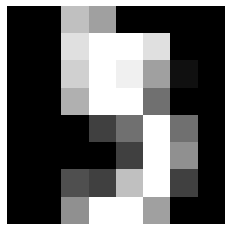

In [10]:
#데이터셋 하나를 확인해봅시다. 

plt.imshow(hand.data[5].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show() 

#### 1-3. 다양한 모델로 학습시키고 성능 판단하기 
* 아래의 5가지 모델로 분류기 모델을 만들어, 테스트 데이터를 학습 시키고, 성능을 시험 해 봅시다. 
* 이 중, 어떤 모델이 가장 좋은 성능을 보일까요? 
- 동일한 조건에서 정확도 등을 비교하기 위해, 전 모델의 random_state = 35 로 고정.
* 선정한 모델에는 🎀 를 붙여주었다. 
    1. Decision Tree - dt
    2. Random Forest - rf
    3. SVM 선형 분류 알고리즘  - svm
    4. SGD Classifier -sgd 
    5. Logistic Regression - logi 

----

### 1. Decision Tree  (의사결정 나무)

In [11]:
#분류기 모델 만들기
decision_tree1 = DecisionTreeClassifier(random_state=35)
# print(decision_tree._estimator_type)

#분류기 모델 학습하기 
decision_tree1.fit(X1_train, y1_train)

# 모델의 성능 예측하기
y1dt_pred = decision_tree1.predict(X1_test) 

# 한눈에 보는 평가 지표 
# test 정답지 y1 이랑 x1 테스트 데이터에 대한 예상 정답률을 비교 해 봤을 때, 
print(classification_report(y1_test, y1dt_pred))

# 오차 행렬로도 확인 
confusion_matrix(y1_test, y1dt_pred)


              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.70      0.94      0.80        32
           2       0.79      0.84      0.82        32
           3       0.94      0.81      0.87        36
           4       0.87      0.70      0.78        37
           5       0.84      0.92      0.88        39
           6       1.00      1.00      1.00        39
           7       0.86      0.95      0.90        38
           8       0.72      0.68      0.70        31
           9       0.86      0.74      0.80        43

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



array([[30,  0,  1,  0,  0,  1,  0,  0,  1,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  3, 27,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0, 29,  0,  1,  0,  0,  2,  2],
       [ 2,  2,  2,  0, 26,  1,  0,  2,  1,  1],
       [ 0,  0,  0,  0,  1, 36,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 36,  1,  0],
       [ 0,  2,  3,  1,  2,  1,  0,  1, 21,  0],
       [ 0,  3,  1,  0,  1,  2,  0,  3,  1, 32]])

* Decision Tree 의 정확도는 85%, 오차 행렬로 확인 해 봤을 때도 많이 틀린 것을 확인 할 수 있다.
* 데이터를 결정하는 경계가 수직적이기 때문에 오차가 많이 날 수 밖에 없었을 것이다. 

----

### 2. Random Forest 

In [12]:
# 모델 만들기
random_forest1 = RandomForestClassifier(random_state = 35)

#학습
random_forest1.fit(X1_train, y1_train)

# 예측하기
y1rf_pred = random_forest1.predict(X1_test)

#평가지표 확인하기 
print(classification_report(y1_test, y1rf_pred))

# 오차 행렬로도 확인 
confusion_matrix(y1_test, y1rf_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.94      1.00      0.97        32
           2       1.00      1.00      1.00        32
           3       0.97      1.00      0.99        36
           4       0.95      0.95      0.95        37
           5       0.97      0.95      0.96        39
           6       1.00      1.00      1.00        39
           7       0.93      0.97      0.95        38
           8       0.90      0.87      0.89        31
           9       0.97      0.91      0.94        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  2, 39]])

* Random Forest, 의사결정 나무의 단점을 극복하기 위해 제안된 모델 답게, 의사결정나무보다 훨신 높은 정확도를 나타낸다. 숫자 0의 분류는 완벽한 것 같다😄
* 다만 4,7,8,9, 특히 8과 9 의 정답률 및 재현율이 낮은걸로 보아, random forest 로도 구분은 힘들었나보다. 
* 랜덤으로 타겟을 지정해서 분류하기 때문에 정확하게 손글씨 데이터를 판단해야하는 문제의 취지와는 맞지 않다고 생각함. 

----

### 3. SVM (서포트 벡터 머신)  🎀

In [13]:
# 모델 제작
svm_model1 = svm.SVC(random_state = 35)
# print(svm_model1._estimator_type)

# 모델 학습
svm_model1.fit(X1_train, y1_train)

# 예측
y1svm_pred = svm_model1.predict(X1_test)

# 평가지표 확인하기 
print(classification_report(y1_test, y1svm_pred))

# 오차 행렬 확인 
confusion_matrix(y1_test, y1svm_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.94      1.00      0.97        32
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        36
           4       1.00      0.95      0.97        37
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.99        38
           8       0.91      0.94      0.92        31
           9       0.98      0.95      0.96        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 41]])

* 높다! 98%의 정확률! 오차행렬로 확인 해 봐도, 1,7,8,9 외에는 전부 정답이다. 
    정확성 외에 precision 이나 recall 등 다른 수치를 봐도 위 두 모델보다는 월등한 성적이다. 
* random forest 모델에서도 구분이 잘 되지 않았던 숫자 8과 9도 다른 모델에 비해서 오답률이 가장 적었다. 

* 서포트 벡터를 결정 경계로 데이터를 분류하기 때문에, 가장 가까운 값을 선출 하므로 이번 문제에서 다른 분류모델보다 더 적합하다고 생각했다.

----

### 4. SGD Classifier (선형분류) 

In [14]:
# 모델 생성
sgd_model1 = SGDClassifier(random_state = 35)
# print(sgd_model)

# 모델 학습
sgd_model1.fit(X1_train, y1_train) 

#예측 
y1sgd_pred = sgd_model1.predict(X1_test)

# 평가지표 확인하기
print(classification_report(y1_test,y1sgd_pred))

# 오차 행렬 확인 
confusion_matrix(y1_test, y1sgd_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.84      0.92        32
           2       1.00      1.00      1.00        32
           3       0.92      0.94      0.93        36
           4       0.76      1.00      0.86        37
           5       0.97      0.95      0.96        39
           6       1.00      1.00      1.00        39
           7       0.95      0.95      0.95        38
           8       0.84      0.84      0.84        31
           9       0.97      0.81      0.89        43

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  1,  2,  0,  0,  0,  2,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  3,  1,  0,  1, 26,  0],
       [ 0,  0,  0,  2,  4,  0,  0,  0,  2, 35]])

* 정확도나 다른 수치는 높지만, 최소값을 찾아 알맞은 가중치를 찾아내는 SGD는 번호에 해당하는 알맞은 손글씨를 찾아야하는 이번 과제와는 맞지 않다 생각한다. 
* 그림은 수열로 이루어진 데이터인데, 숫자 데이터의 최소값이나 가중치를 찾아내는건 손그림 구분에는 사용할 수 없을거라 생각했다. 

----

### 5. Logistic Regression 

In [15]:
# 모델 생성
logistic_model1 = LogisticRegression(random_state = 35)
# print(logistic_model1._estimator_type)

# 모델 학습
logistic_model1.fit(X1_train, y1_train)

# 예측
y1logi_pred = logistic_model1.predict(X1_test)

# 평가지표 확인하기
print(classification_report(y1_test, y1logi_pred))

# 오차 행렬 확인 
confusion_matrix(y1_test, y1logi_pred)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.94      0.97      0.95        32
           2       0.94      1.00      0.97        32
           3       1.00      0.97      0.99        36
           4       0.92      0.92      0.92        37
           5       1.00      0.92      0.96        39
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        38
           8       0.88      0.94      0.91        31
           9       0.93      0.93      0.93        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[32,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 34,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0,  1, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  2, 40]])

* Logistic Regression는 데이터가 0 에서 1 사이의 값으로 한 범주에 속할 확률에 따라 가능성이 더 높은 범주에 속하는 쪽으로 분류 해 주는 알고리즘이다. 손글씨 데이터는 명확하게 1이면 1, 2면 2 라는 정답이 정해져 있기 때문에, 값을 예측해서 분류하는 분류모델은 이번 문제와는 적합하지 않다고 생각한다. 

----

----

# 2. 와인 분류하기 -  load_wine 🍷

2번째로 다뤄볼 데이터 셋은 와인 데이터이다.  
DESCR 로 확인 해 볼 수도 있지만, 그래도 데이터를 다루기 전에 한번은 읽어와도 좋을것 같다! => [와인데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

## 2-1. 데이터 준비
* 가져온 와인 데이터셋에는 어떤 데이터가 들어있을까? 확인 해 보자
* 또, 데이터를 지정해 주고 잘 되었는지도 확인 해보자. 

In [16]:
# 가져온 데이터셋 확인 - 어떤 변수와 메서드를 가지고 있나? 
wine = load_wine()
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [17]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

1. 와인 데이터는 총 178개 이며, 13개의 특성, label은 0,1,2 총 3개의 클래스로 나눠진 데이터셋이다. 
2. 와인 데이터는 3개의 클래스 중 한 와인을 분류 하는 문제이므로 **분류 문제** ,   
    정답이(label) 존재하므로 **지도학습** 이라 할 수 있다. 

## 2-2. 데이터 이해하기 

In [18]:
# data : 데이터의 크기, 모델이 학습 해야 할 데이터 
# feature_names : 각 feature에 대한 설명 = 열 제목  
# target : label 데이터  = 정답지 
# target_names : 클래스의 원래 이름  

wine_data = wine.data # 문제지 데이터
wine_label = wine.target # 정답지 데이터 
wine_lbname = wine.target_names # 정답지 데이터 클래스의 원래 이름 

In [19]:
#와인 데이터의 형태를 확인. 
print(wine_data.shape) 

# 클래스 이름도 확인 해 보자!
wine_lbname

(178, 13)


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [20]:
# 와인 데이터의 data 
df2 = pd.DataFrame(wine_data, columns=wine.feature_names)
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## 2-3. train, test 데이터 분리

* scikit-learn의 train_test_split 을 활용하여 Data를 나눠보자.  
X 변수는 모델이 풀어야 할 문제지 , y 변수는 정답지 로 표현하였습니다.  
학습용 : test용 = 8 : 2 비율로 나눴습니다.  
* 와인 데이터에 대한 문제,정답지 이므로 변수 옆에 숫자 2를 기입했습니다. 
     * 1 = 손글씨, **2 = 와인** , 3 = 유방암 

In [21]:
#데이터 나누기 
X2_train, X2_test, y2_train, y2_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=35)

In [22]:
print('와인분류 학습용 문제지 데이터 : ', X2_train.shape)
print('와인분류 학습용 정답지 데이터 : ', y2_train.shape)
print('와인분류 test용 문제지 데이터 : ', X2_test.shape)
print('와인분류 test용 정답지 데이터 : ', y2_test.shape)

와인분류 학습용 문제지 데이터 :  (142, 13)
와인분류 학습용 정답지 데이터 :  (142,)
와인분류 test용 문제지 데이터 :  (36, 13)
와인분류 test용 정답지 데이터 :  (36,)


In [23]:
#와인 데이터셋 확인 해 보기 

wine.data[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

## 2-4. 다양한 모델로 학습시켜보기 

* 아래의 5가지 모델로 분류기 모델을 만들어, 테스트 데이터를 학습 시키고, 성능을 시험 해 봅시다.
* 이 중, 어떤 모델이 가장 좋은 성능을 보일까요?
* 동일한 조건에서 정확도 등을 비교하기 위해, 전 모델의 random_state = 35 로 고정.
* 선정한 모델에는 🎀 를 붙여주었다. 
        Decision Tree - dt
        Random Forest - rf
        SVM 선형 분류 알고리즘 - svm
        SGD Classifier -sgd
        Logistic Regression - logi


---

### 1. Decision Tree (의사결정 나무)

In [24]:
#분류기 모델 만들기
decision_tree2 = DecisionTreeClassifier(random_state=35)
# print(decision_tree._estimator_type)

#분류기 모델 학습하기 
decision_tree2.fit(X2_train, y2_train)

# 모델의 성능 예측하기
y2dt_pred = decision_tree2.predict(X2_test) 

# 한눈에 보는 평가 지표 
# test 정답지 y1 이랑 x1 테스트 데이터에 대한 예상 정답률을 비교 해 봤을 때, 
print(classification_report(y2_test, y2dt_pred))

# 오차 행렬로도 확인 
confusion_matrix(y2_test, y2dt_pred)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.80      0.86      0.83        14
           2       0.89      0.80      0.84        10

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



array([[11,  1,  0],
       [ 1, 12,  1],
       [ 0,  2,  8]])

* 클래스가 2개 이상인 데이터셋에서는 힘을 많이 못 쓰는 의사결정나무 인것같다.. 
* 정답률이 90%를 넘어가지 않아, 이번 문제에서도 부적합한 모델인걸로 판단하였습니다.

----

### 2. Random Forest  🎀

In [25]:
# 모델 만들기
random_forest2 = RandomForestClassifier(random_state = 35)

#학습
random_forest2.fit(X2_train, y2_train)

# 예측하기
y2rf_pred = random_forest2.predict(X2_test)

#평가지표 확인하기 
print(classification_report(y2_test, y2rf_pred))

# 오차 행렬로도 확인 
confusion_matrix(y2_test, y2rf_pred)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



array([[11,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

* 여러개의 작은 의사결정나무를 만들고, 나무들이 내린 예측 값들 중 가장 많이 나온 값을 최종예측값으로 지정하는 random Forest. 
* 의사결정나무 하나만 가지고 테스트 했을 때 보다 월등하게 좋은 성적을 보인다. 

----

### 3. SVM (서포트 벡터 머신)

In [26]:
# 모델 제작
svm_model2 = svm.SVC(random_state = 35)
# print(svm_model1._estimator_type)

# 모델 학습
svm_model2.fit(X2_train, y2_train)

# 예측
y2svm_pred = svm_model2.predict(X2_test)

# 평가지표 확인하기 
print(classification_report(y2_test, y2svm_pred))

# 오차 행렬 확인 
confusion_matrix(y2_test, y2svm_pred)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.59      0.71      0.65        14
           2       0.38      0.30      0.33        10

    accuracy                           0.61        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.61      0.61      0.60        36



array([[ 9,  0,  3],
       [ 2, 10,  2],
       [ 0,  7,  3]])

* 벡터를 기준으로 가장 근접한 카테고리에 속하는지 판단하는 서포트 벡터 머신. 첫번째 데이터처럼 데이터를 놓고 비교하는 모델이라 생각해서 손글씨 데이터만큼 좋은 성적을 보일 것 같단 내 생각과는 다르게, 정확도가 높지않다. 이 모델로 와인데이터를 효율적으로 학습하긴 어려운것같다. 

----

### 4. SGD Classifier (선형분류) 

In [27]:
# 모델 생성
sgd_model2 = SGDClassifier(random_state = 35)
# print(sgd_model)

# 모델 학습
sgd_model2.fit(X2_train, y2_train) 

#예측 
y2sgd_pred = sgd_model2.predict(X2_test)

# 평가지표 확인하기
print(classification_report(y2_test,y2sgd_pred))

# 오차 행렬 확인 
confusion_matrix(y2_test, y2sgd_pred)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.53      0.64      0.58        14
           2       0.20      0.20      0.20        10

    accuracy                           0.56        36
   macro avg       0.58      0.53      0.55        36
weighted avg       0.59      0.56      0.57        36



array([[9, 0, 3],
       [0, 9, 5],
       [0, 8, 2]])

* 랜덤하게 추출한 일부 데이터들에게 가중치를 조절한다는 특성 때문에져분류모델의 정확도가 낮아져 데이터를 확실하게 분류해 내지 못한것 같다. 데이터가 어느 한쪽에 편중되어있지 않기 때문에, 정답률만봐도 이 모델은 적합하지 않다고 판단할 수 있다. 

----

### 5. Logistic Regression 

In [28]:
# 모델 생성
logistic_model2 = LogisticRegression(random_state = 35)
# print(logistic_model1._estimator_type)

# 모델 학습
logistic_model2.fit(X2_train, y2_train)

# 예측
y2logi_pred = logistic_model2.predict(X2_test)

# 평가지표 확인하기
print(classification_report(y2_test, y2logi_pred))

# 오차 행렬 확인 
confusion_matrix(y2_test, y2logi_pred)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.82      1.00      0.90        14
           2       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[11,  1,  0],
       [ 0, 14,  0],
       [ 0,  2,  8]])

* 정확도는 92% 지만, 각 클래스 별 정밀도나 재현률을 확인 해 봤을 때, 90%에 가까운 비율이 Random Forest 보다 낮기 때문에, 와인 데이터는 로지스틱 회귀 보단 Random Forest 분류모델이 더 적합하다고 볼 수 있다. 

---------

# 3. 유방암 여부를 진단 해 봅시다 - load_breast_cancer

* 마지막으로 다뤄볼 데이터셋은 유방암 여부 진단 데이터셋. 
* DESCR 로 확인 해 볼 수도 있지만, 그래도 데이터를 다루기 전에 한번은 읽어와도 좋을것 같다! => [유방암 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)


## 3-1 데이터 준비

In [29]:
# 가져온 데이터셋 확인 - 어떤 변수와 메서드를 가지고 있나? 
cancer = load_breast_cancer()
print(dir(cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [30]:
# 유방암 여부 진단 데이터의 정보를 확인 해 보자
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

1. 유방암 진단 데이터는 총 569개의 샘플, 30개의 특성과 2개의 label(악성, 양성) 으로 이루어진 데이터셋이다. 
2. 유방암 진단 데이터는 2개의 클래스 양성 or 음성을 30개의 특성을 보고 분류하는 문제이며, target data 가 존재 하기 때문에, **지도학습 이고, 분류문제** 라 할 수 있다. 

## 3-2 데이터 이해하기

In [31]:
# data : 데이터의 크기, 모델이 학습 해야 할 데이터 
# feature_names : 각 feature에 대한 설명 = 열 제목  
# target : label 데이터  = 정답지 
# target_names : 클래스의 원래 이름  

cancer_data = cancer.data # 문제지 데이터
cancer_label = cancer.target # 정답지 데이터 
cancer_lbname = cancer.target_names # 정답지 데이터 클래스의 원래 이름 

#유방암 데이터의 형태를 확인. 
print(cancer_data.shape) 
# malignant : 악성 , benign : 양성
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]


# 악성, 양성 다 포함 한 데이터 
print('malignant(악성) => ',malignant.shape)
print('malignant(양성) => ',benign.shape)
cancer_lbname



(569, 30)
malignant(악성) =>  (212, 30)
malignant(양성) =>  (357, 30)


array(['malignant', 'benign'], dtype='<U9')

In [32]:
print(cancer_data.ndim)
print(cancer_data.shape)
print(cancer.feature_names[[3,13,23]])
# 인터넷에서 찾아본, target 데이터 확인하는 법 
np.unique(cancer.target, return_counts=True)

2
(569, 30)
['mean area' 'area error' 'worst area']


(array([0, 1]), array([212, 357]))

In [33]:
# 손글씨 데이터에 대한 data 
df3 = pd.DataFrame(cancer_data, columns=cancer.feature_names)
df3

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3-3 train, test 데이터 분리

* scikit-learn의 train_test_split 을 활용하여 Data를 나눠보자. 
* X 변수는 모델이 풀어야 할 문제지 , y 변수는 정답지 로 표현하였습니다.
* 학습용 : test용 = 8 : 2 비율로 나눴습니다. 
* 유방암 분류 데이터에 대한 문제,정답지 이므로 변수 옆에 숫자 3을 기입했습니다. 
     * 1 = 손글씨, 2 = 와인, **3 = 유방암** 


In [34]:
#데이터 나누기 
X3_train, X3_test, y3_train, y3_test = train_test_split(cancer_data, 
                                                        cancer_label, 
                                                        stratify=cancer_label, 
                                                        test_size=0.2, random_state=35)

* **stratify**  : 지정한 데이터의 비율을 유지한다. 
   => 유방암 분류 데이터는 악성과 양성, 2가지의 클래스로 나뉘어져 있기 때문에 데이터의 비율을 적절하게 유지하기 위해 적용하는 함수.  

In [35]:
print('손글씨 학습용 문제지 데이터 : ', X3_train.shape)
print('손글씨 학습용 정답지 데이터 : ', y3_train.shape)
print('손글씨 test용 문제지 데이터 : ', X3_test.shape)
print('손글씨 test용 정답지 데이터 : ', y3_test.shape)

손글씨 학습용 문제지 데이터 :  (455, 30)
손글씨 학습용 정답지 데이터 :  (455,)
손글씨 test용 문제지 데이터 :  (114, 30)
손글씨 test용 정답지 데이터 :  (114,)


In [36]:
X3_test

array([[1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
        8.321e-02],
       [1.246e+01, 2.404e+01, 8.397e+01, ..., 2.210e-01, 4.366e-01,
        2.075e-01],
       [1.944e+01, 1.882e+01, 1.281e+02, ..., 2.060e-01, 3.266e-01,
        9.009e-02],
       ...,
       [1.492e+01, 1.493e+01, 9.645e+01, ..., 1.147e-01, 2.688e-01,
        8.273e-02],
       [1.955e+01, 2.321e+01, 1.289e+02, ..., 1.825e-01, 2.576e-01,
        7.602e-02],
       [1.127e+01, 1.550e+01, 7.338e+01, ..., 8.272e-02, 2.157e-01,
        1.043e-01]])

## 3-4 다양한 모델로 학습시켜보기 

* 아래의 5가지 모델로 분류기 모델을 만들어, 테스트 데이터를 학습 시키고, 성능을 시험 해 봅시다. 
* 이 중, 어떤 모델이 가장 좋은 성능을 보일까요? 
- 동일한 조건에서 정확도 등을 비교하기 위해, 전 모델의 random_state = 35 로 고정. 
* 선정한 모델에는 🎀 를 붙여주었다. 
    1. Decision Tree - dt
    2. Random Forest - rf
    3. SVM 선형 분류 알고리즘  - svm
    4. SGD Classifier -sgd 
    5. Logistic Regression - logi 

----

### 1. Decision Tree  (의사결정 나무)

In [37]:
#분류기 모델 만들기
decision_tree3 = DecisionTreeClassifier(random_state=35)
print(decision_tree3._estimator_type)

#분류기 모델 학습하기 
decision_tree3.fit(X3_train, y3_train)

# 모델의 성능 예측하기
y3dt_pred = decision_tree3.predict(X3_test) 

# 한눈에 보는 평가 지표 
# test 정답지 y1 이랑 x1 테스트 데이터에 대한 예상 정답률을 비교 해 봤을 때, 
print(classification_report(y3_test, y3dt_pred))

# 오차 행렬로도 확인 
confusion_matrix(y3_test, y3dt_pred)


classifier
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.91      0.96      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



array([[35,  7],
       [ 3, 69]])

----

### 2. Random Forest   🎀

In [38]:
# 모델 만들기
random_forest3 = RandomForestClassifier(random_state = 35)

#학습
random_forest3.fit(X3_train, y3_train)

# 예측하기
y3rf_pred = random_forest3.predict(X3_test)

#평가지표 확인하기 
print(classification_report(y3_test, y3rf_pred))

# 오차 행렬로도 확인 
confusion_matrix(y3_test, y3rf_pred)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



array([[40,  2],
       [ 0, 72]])

----

### 3. SVM (서포트 벡터 머신) 

In [39]:
# 모델 제작
svm_model3 = svm.SVC(random_state = 35)
# print(svm_model1._estimator_type)

# 모델 학습
svm_model3.fit(X3_train, y3_train)

# 예측
y3svm_pred = svm_model3.predict(X3_test)

# 평가지표 확인하기 
print(classification_report(y3_test, y3svm_pred))

# 오차 행렬 확인 
confusion_matrix(y3_test, y3svm_pred)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



array([[36,  6],
       [ 0, 72]])

----

### 4. SGD Classifier (선형분류) 

In [40]:
# 모델 생성
sgd_model3 = SGDClassifier(random_state = 35)
# print(sgd_model)

# 모델 학습
sgd_model3.fit(X3_train, y3_train) 

#예측 
y3sgd_pred = sgd_model3.predict(X3_test)

# 평가지표 확인하기
print(classification_report(y3_test,y3sgd_pred))

# 오차 행렬 확인 
confusion_matrix(y3_test, y3sgd_pred)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.92      0.94      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



array([[36,  6],
       [ 4, 68]])

----

### 5. Logistic Regression

In [41]:
# 모델 생성
logistic_model3 = LogisticRegression(random_state = 35)
# print(logistic_model1._estimator_type)

# 모델 학습
logistic_model3.fit(X3_train, y3_train)

# 예측
y3logi_pred = logistic_model3.predict(X3_test)

# 평가지표 확인하기
print(classification_report(y3_test, y3logi_pred))

# 오차 행렬 확인 
confusion_matrix(y3_test, y3logi_pred)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[40,  2],
       [ 4, 68]])

----

* 1,2 처럼 세부내역을 분류하고 싶었지만, 시간관계상 밑줄에 적겠습니다..

1. 데이터 셋이 malignant(악성) =>  (212, 30), malignant(양성) =>  (357, 30) 두 클래스로 나눠져 있기 때문에 데이터셋이 편중되어있다고 판단하여, 이번 데이터셋에선 f1-score를 기준으로 선정.

2. 각 데이터셋 중 f1-score 값을 확인 해 비교 해 봤을 때, 가장 균일하고 높은 결과값을 나타낸 Random Forest 를 적합한 모델로 선정하였다. 

# 결론! 



#### 각 데이터 셋을 다섯개의 모델로 학습 해 봤을 때, 데이터셋 마다 적합하다고 판단한 모델은 다음과 같습니다.   

* 손글씨 데이터셋 => SVM(선형분류알고리즘)
* 와인 데이터셋 => Random Forest
* 유방암 진단 데이터셋 => Random Forest 


# 후기!! 💀

* 시각화.. 좀 더 알기 쉽게 표로 정리한다거나, 시각화 데이터가 있었으면 모델이 얼마만큼 학습 됬고, 어떤 부분이 부족했을 지 알 수 있었을텐데 그걸 못 한 점이 너무너무너무나도 아쉬웠다.

* 또, 이것저것 시도 해 볼꺼라고 미완성인 채로 찾아보다가 기한 1주일 다 되서 제출한 점도 반성할 점. 일단 큰 틀을 해 놓고, 그 후에 거기에 추가하고 싶은 점을 해야하는데.. 욕심만 앞서서 세부 내용만 찾아보다가 큰 틀도 못하고 마감에 쫓겼었는데, 이 점은 반성해서 추후 exp 나 fun 과제 등등 할 때 유념해서 해야할것같다.

* 모델의 5가지 특징을 대략적으로 알고있으면... 선택 이유를 쓰기가 용이할 줄 알았지... 아니더라구요..... 대략적인 특징을 알면, 그걸 기준으로 모델의 평가치를 보고, 아 이것이 좋은 모델! 이라고 선택할 수 있을 줄 알았는데.. 정리하면 정리할 수록 더 모르겠..어...... 간단한 내용만 정리해서는 이걸 완벽하게 이해할 수 없고, 나아가 모델에게 적합한 분류모델이 어떤거일지에 대한 결정도 만족스럽게 할 수 없었다. 공부가 많이 필요하다 역시.. 

# 🖇️ 참고 페이지 

[데이터 사이언스 스쿨](#https://datascienceschool.net/intro.html) : 5개의 모델 데이터
[서포트 벡터 머신](#https://hleecaster.com/ml-svm-concept/)
